In [1]:
import numpy as np
import matplotlib.pylab as plt

In [32]:
masas, num = 15, 10
redondo = []
for i in range(masas):
    for j in range(num):
        redondo.append(np.genfromtxt('/home/codorso/JoseAye/23_05/circular_{}_{}'.format(i,j), usecols=(2,3)))

In [33]:
matriz_voltaje = np.zeros((masas,num))
matriz_error = np.zeros((masas,num))
for i in range(masas):
    for j in range(num): #en volts
        matriz_voltaje[i,j] = np.mean(np.genfromtxt('/home/codorso/JoseAye/23_05/circular_{}_{}'.format(i,j), usecols=(3)))*5/1023
        matriz_error[i,j] = np.std(np.genfromtxt('/home/codorso/JoseAye/23_05/circular_{}_{}'.format(i,j), usecols=(3)))*5/1023

In [43]:
#legend_amp = ['0' ,'1', '2', '3', '4', '5', '6']#, '7', '8', '9', '10', '11', '12']
m1, m2, m3, m4, m5, m6, m7 = 491.41, 497.13, 248.62, 248.64, 99.89, 50.58, 11.29
masitas = [0, m5, m3, m3+m5, m2, m2+m5, m2+m3, m2+m3+m5, m1+m2, m1+m2+m5, m1+m2+m3, m1+m2+m3+m4, m1+m2+m3+m4+m5, m6, m7]+2.29*np.ones(masas)
superficie = np.pi*0.95**2
print(superficie)

2.8352873698647882


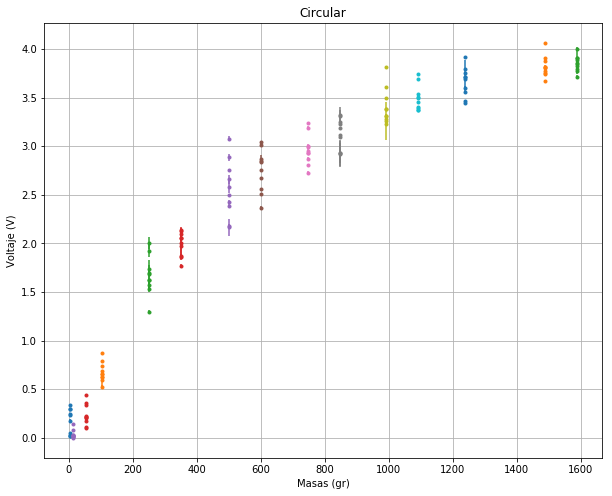

In [44]:
plt.figure(figsize=(10,8))

for i in range(masas):
    plt.errorbar(masitas[i]*np.ones(num), matriz_voltaje[i,:], yerr=matriz_error[i,:], fmt='.')#, label= legend_amp[i])
    plt.xlabel('Masas (gr)')
    plt.ylabel('Voltaje (V)')
    #plt.legend()
plt.grid()
plt.title('Circular')
#plt.savefig('circular_VvsM.png')
plt.show()

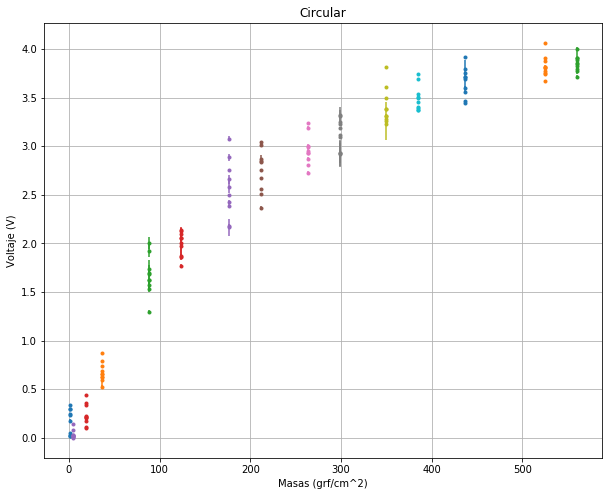

In [42]:
plt.figure(figsize=(10,8))

for i in range(masas):
    plt.errorbar(masitas[i]*np.ones(num)/superficie, matriz_voltaje[i,:], yerr=matriz_error[i,:], fmt='.')#, label= legend_amp[i])
    plt.xlabel('Masas (grf/cm^2)')
    plt.ylabel('Voltaje (V)')
    #plt.legend()
plt.grid()
plt.title('Circular')
#plt.savefig('cuadrada_masas_continua.png')
plt.show()

In [37]:
Vin, R = 5, 820000
matriz_resistencias = np.zeros((masas,num))
for i in range(masas):
    for j in range(num):
        if matriz_voltaje[i,j]!=0:
            matriz_resistencias[i,j] = (Vin/matriz_voltaje[i,j] -1)*R

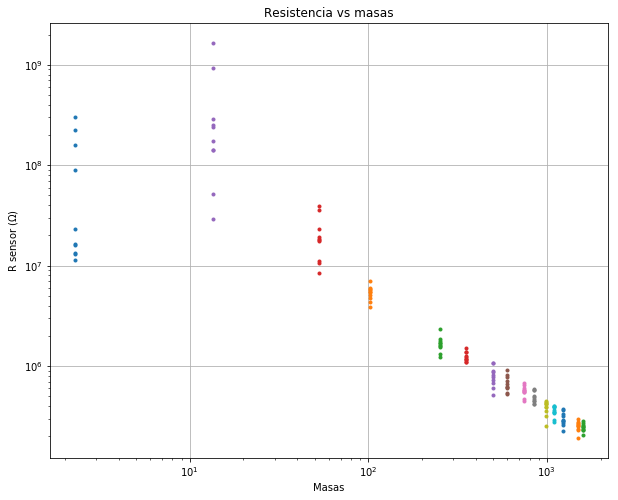

In [38]:
plt.figure(figsize=(10,8))

for i in range(masas):
    plt.loglog(masitas[i]*np.ones(num), matriz_resistencias[i,:], '.')#, label= legend_amp[i])
    plt.xlabel('Masas')
    plt.ylabel('R sensor ($\Omega$)')
    #plt.legend()
#plt.lim(0,10**7)
plt.grid()
plt.title('Resistencia vs masas')
#plt.savefig('circular_masas_cinturon_voltaje.png')
plt.show() 

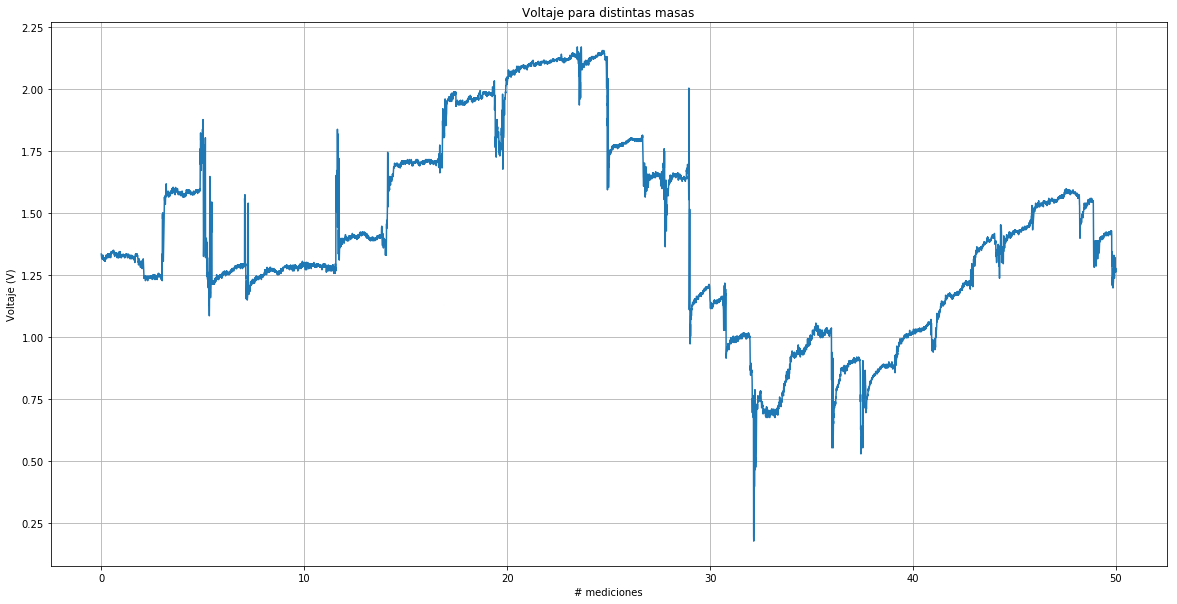

In [10]:
prueba = np.genfromtxt('/home/codorso/JoseAye/17_05/ver', usecols=(2,3)) #agregando masas de a una, sobre vidrio
plt.figure(figsize=(20,10))

plt.plot(np.linspace(0,50, len(prueba[:,1])), prueba[:,1]*5/1023, '-')
plt.xlabel('# mediciones')
plt.ylabel('Voltaje (V)')

plt.grid()
plt.title('Voltaje para distintas masas')
#plt.savefig('cuadrada_masas_continua.png')
plt.show() 

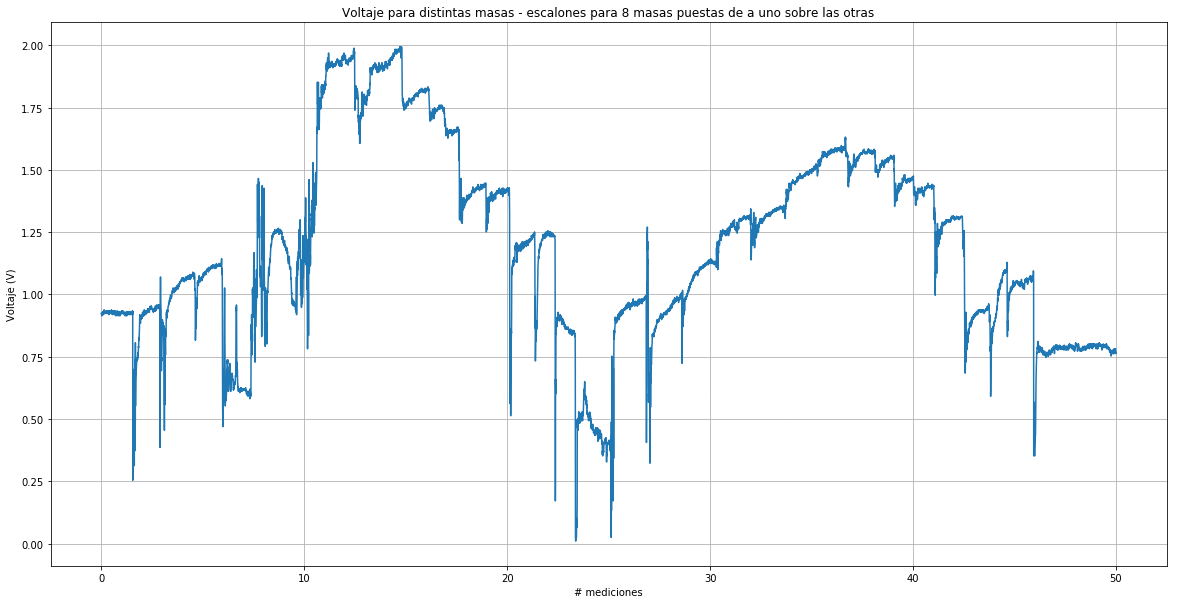

In [14]:
pruebo = np.genfromtxt('/home/codorso/JoseAye/17_05/vor', usecols=(2,3)) #apilando masas sobre moneda directo, 8 masas de 100gr aprox c/u

plt.figure(figsize=(20,10))
plt.plot(np.linspace(0,50, len(pruebo[:,1])), pruebo[:,1]*5/1023, '-')
plt.xlabel('# mediciones')
plt.ylabel('Voltaje (V)')
plt.grid()
plt.title('Voltaje para distintas masas - escalones para 8 masas puestas de a uno sobre las otras')
#plt.savefig('circular_masas_deapoco.png')
plt.show() 

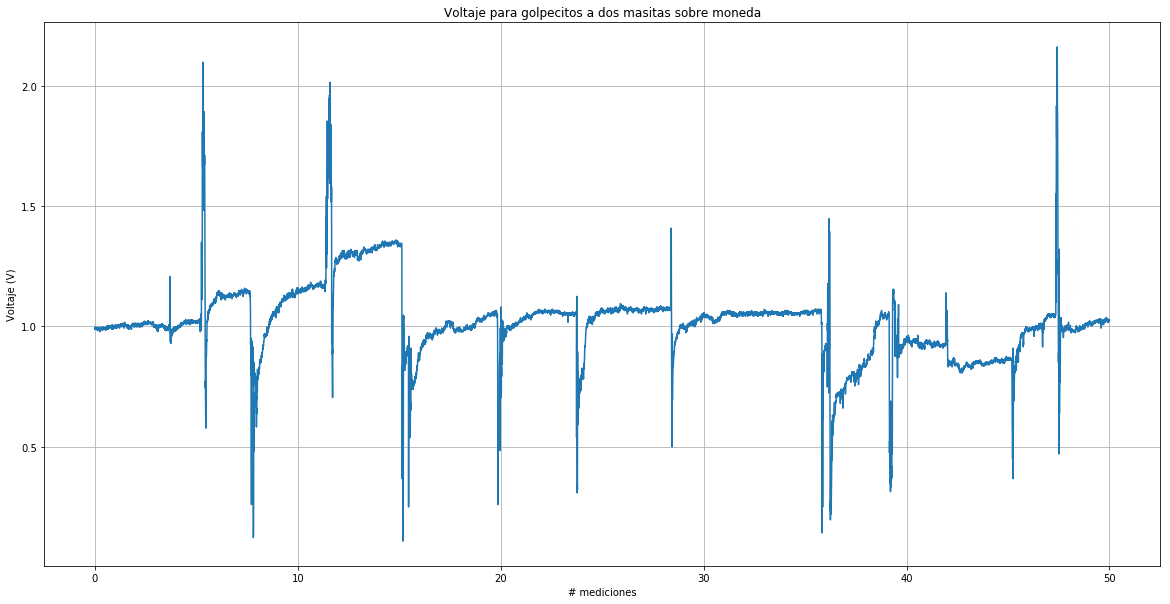

In [13]:
golpes = np.genfromtxt('/home/codorso/JoseAye/17_05/golpes', usecols=(2,3)) #dandole golpecitos/levantando las masas y volviendolas a poner, acomodando (la misma masa, 2 masitas)

plt.figure(figsize=(20,10))
plt.plot(np.linspace(0,50, len(golpes[:,1])), golpes[:,1]*5/1023, '-')
plt.xlabel('# mediciones')
plt.ylabel('Voltaje (V)')
plt.grid()
plt.title('Voltaje para golpecitos a dos masitas sobre moneda')
#plt.savefig('circular_masas2_golpecitos.png')
plt.show()